# Exploring the UMAP space

In [9]:
# imports
import numpy as np
import scipy

from matplotlib import pyplot as plt
import seaborn as sns

from ulmo import io as ulmo_io
from ulmo.plotting import plotting

In [3]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('notebook')

# Load up

In [2]:
modis_tbl = ulmo_io.load_main_table('s3://modis-l2/Tables/MODIS_L2_std.parquet')

Read main table: s3://modis-l2/Tables/MODIS_L2_std.parquet


In [4]:
modis_tbl['DT'] = modis_tbl.T90 - modis_tbl.T10
modis_tbl['logDT'] = np.log10(modis_tbl.DT)

In [5]:
modis_tbl['min_slope'] = np.minimum(modis_tbl.zonal_slope, modis_tbl.merid_slope)

# 2D stats

## Min slope

In [7]:
median_slope, x_edge, y_edge, ibins = scipy.stats.binned_statistic_2d(
    modis_tbl.U0, modis_tbl.U1, modis_tbl.min_slope,
    statistic='median', expand_binnumbers=True,
    bins=[24, 24])

In [8]:
median_slope.shape

(24, 24)

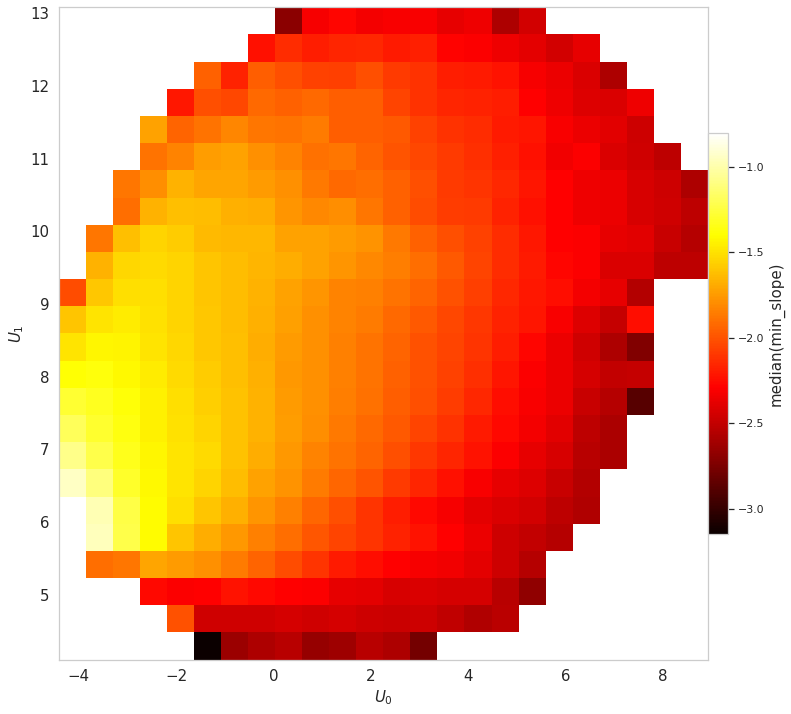

In [24]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca()
cm = plt.get_cmap('hot')
mplt = ax.pcolormesh(x_edge, y_edge, 
                     median_slope.transpose(),
                     cmap=cm, 
                     vmax=None) 
# Color bar
cbaxes = plt.colorbar(mplt, pad=0., fraction=0.030)
cbaxes.set_label('median(min_slope)', fontsize=15.)
#cb.set_label(lbl, fontsize=20.)
#cbaxes.yaxis.set_ticks_position('left')

ax.set_xlabel(r'$U_0$')
ax.set_ylabel(r'$U_1$')
#
plotting.set_fontsize(ax,15.)

## Cloud coverage

In [25]:
median_CC, x_edge, y_edge, ibins = scipy.stats.binned_statistic_2d(
    modis_tbl.U0, modis_tbl.U1, modis_tbl.clear_fraction,
    statistic='median', expand_binnumbers=True,
    bins=[24, 24])

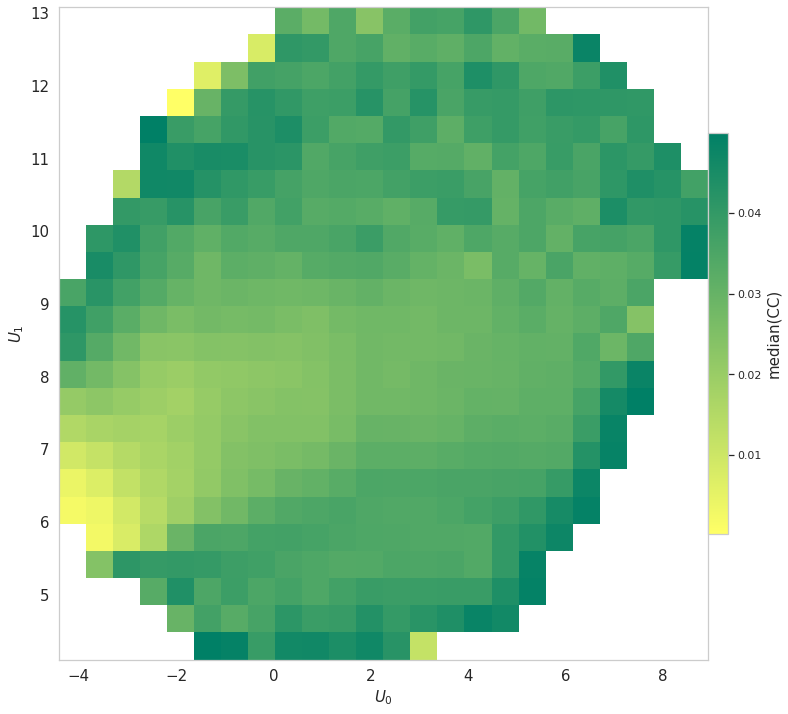

In [33]:
fig = plt.figure(figsize=(12,12))
ax = plt.gca()
cm = plt.get_cmap('summer_r')
mplt = ax.pcolormesh(x_edge, y_edge, 
                     median_CC.transpose(),
                     cmap=cm, 
                     vmax=None) 
# Color bar
cbaxes = plt.colorbar(mplt, pad=0., fraction=0.030)
cbaxes.set_label('median(CC)', fontsize=15.)
#cb.set_label(lbl, fontsize=20.)
#cbaxes.yaxis.set_ticks_position('left')

ax.set_xlabel(r'$U_0$')
ax.set_ylabel(r'$U_1$')
#
plotting.set_fontsize(ax,15.)